# Génération de figures pour le chapitre Bonnes Pratiques

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('font', **{'family':'sans', 'size': 18})

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

In [4]:
import scipy.stats as st

In [17]:
import pandas as pd

### Bar plot

In [7]:
yyy = [0.70, 0.72, 0.69, 0.73]

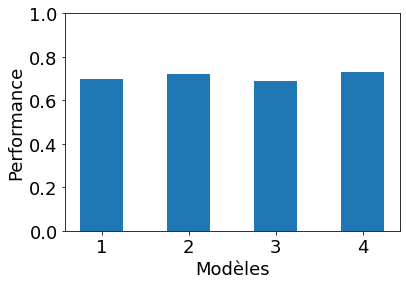

In [15]:
plt.bar(range(len(yyy)), yyy, width=0.5, tick_label=['1', '2', '3', '4'])
plt.xlabel("Modèles")
plt.ylabel("Performance")
plt.ylim(0., 1.)
plt.savefig('../poly/figures/pratiques/bars_start_zero.pdf', bbox_inches='tight')

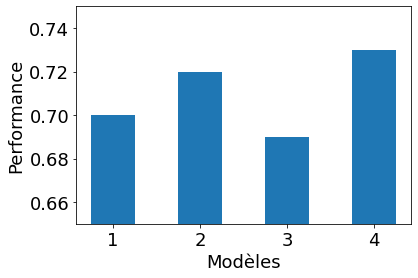

In [14]:
plt.bar(range(len(yyy)), yyy, width=0.5, tick_label=['1', '2', '3', '4'])
plt.xlabel("Modèles")
plt.ylabel("Performance")
plt.ylim(0.65, 0.75)
plt.savefig('../poly/figures/pratiques/bars_start_nonzero.pdf', bbox_inches='tight')

### Line plots

In [18]:
meteo = pd.read_csv('../data/meteo_data.csv')

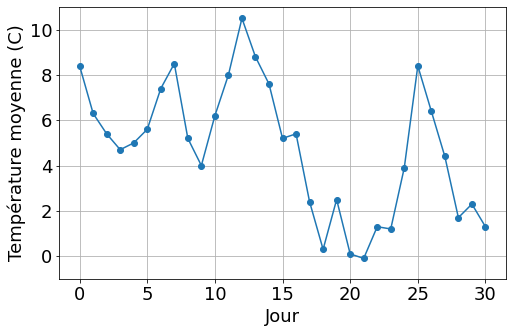

In [40]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(meteo.t_moy)), meteo.t_moy, 'o-')
plt.ylim(-1, 11)
plt.xlabel("Jour")
plt.ylabel("Température moyenne (C)")
plt.grid()
plt.savefig('../poly/figures/pratiques/line_start_nonzero.pdf', bbox_inches='tight')

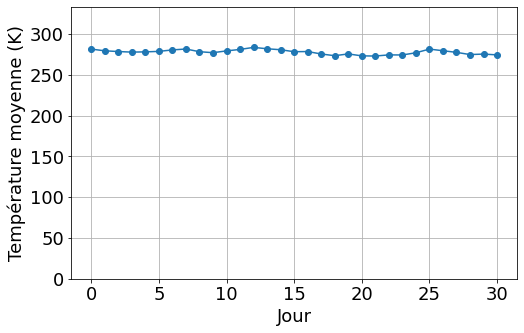

In [39]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(meteo.t_moy)), meteo.t_moy+273.15, 'o-')
plt.ylim(0, (60+273.15))
plt.xlabel("Jour")
plt.ylabel("Température moyenne (K)")
plt.grid()
plt.savefig('../poly/figures/pratiques/line_start_zero.pdf', bbox_inches='tight')

### Proportional ink 

In [79]:
xxx = np.array([0.22, 0.24, 0.11, 0.10, 0.18, 0.08, 0.05, 0.02])

In [80]:
np.sum(xxx)

1.0

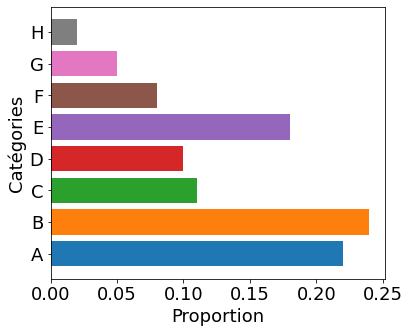

In [120]:
fig = plt.figure(figsize=(6, 5))
plt.barh(np.arange(len(xxx)), xxx, height=0.8, tick_label=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], color=def_colors[:8])
plt.ylabel("Catégories")
plt.xlabel("Proportion")
#plt.ylim(0., .3)
plt.savefig('../poly/figures/pratiques/areas_bars.pdf', bbox_inches='tight')

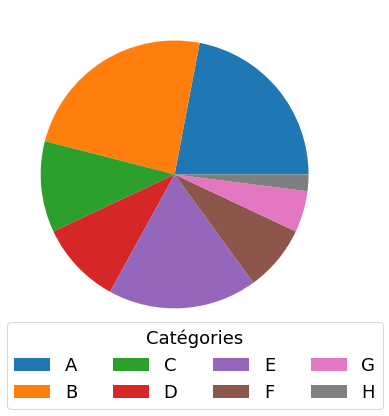

In [144]:
fig = plt.figure(figsize=(6, 8))
wedges, txt, autotxt = plt.pie(xxx, autopct='')
plt.legend(wedges, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], loc=(0.0, -0.2),title="Catégories", ncol=4)
#plt.xlabel("Valeurs")
#plt.ylabel("Proportion")
#plt.ylim(0., .3)
plt.savefig('../poly/figures/pratiques/areas_pie.pdf', bbox_inches='tight')

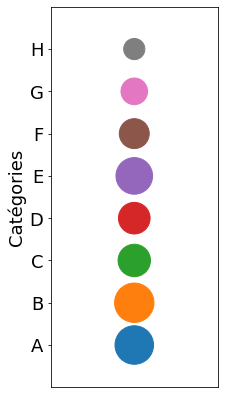

In [126]:
fig = plt.figure(figsize=(3, 7))
t=plt.scatter([1 for x in range(len(xxx))], range(len(xxx)), c=def_colors[:len(xxx)], s=np.sqrt(10000000*xxx))
plt.ylabel("Catégories")
plt.yticks(range(len(xxx)), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
plt.xticks([])
plt.ylim(-1, 8)
#plt.ylabel("Proportion")
#plt.xlabel("Valeurs")
#plt.ylabel("Proportion")
#plt.ylim(0., .3)
plt.savefig('../poly/figures/pratiques/areas_bubbles.pdf', bbox_inches='tight')

### Colormaps for heatmaps

#### Reusing code from PC2

In [146]:
import pandas as pd
my_data = pd.read_csv('../data/decathlon.txt', sep="\t")  # lire les données dans un dataframe

In [147]:
my_data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [148]:
X = np.array(my_data.drop(columns=['Points', 'Rank', 'Competition']))
print(X.shape)

(41, 10)


In [149]:
from sklearn import preprocessing

In [150]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [151]:
from sklearn import decomposition

In [152]:
# Instanciation d'un objet PCA pour 10 composantes principales
pca = decomposition.PCA(n_components=10)
print(type(pca))

<class 'sklearn.decomposition._pca.PCA'>


In [153]:
# On passe maintenant les données standardisées à cet objet
# C'est ici que se font les calculs
pca.fit(X_scaled)

PCA(n_components=10)

In [154]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

(41, 2)


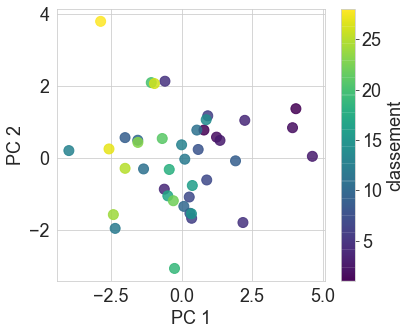

In [186]:
fig = plt.figure(figsize=(6, 5))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=my_data['Rank'], s=100, cmap=plt.get_cmap('viridis'), alpha=0.85)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='classement')
plt.savefig('../poly/figures/pratiques/pca_plot_viridis.pdf', bbox_inches='tight')

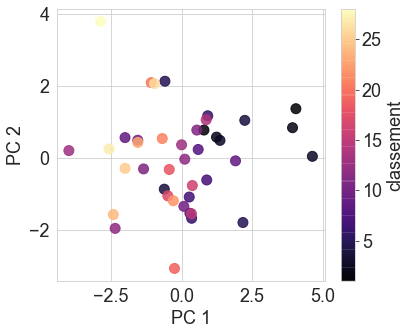

In [189]:
fig = plt.figure(figsize=(6, 5))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=my_data['Rank'], cmap=plt.get_cmap('magma'), s=100, alpha=0.85)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='classement')

plt.savefig('../poly/figures/pratiques/pca_plot_magma.pdf', bbox_inches='tight')

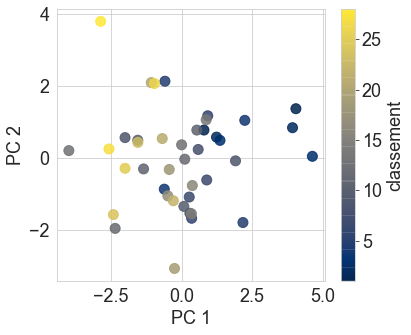

In [184]:
fig = plt.figure(figsize=(6, 5))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=my_data['Rank'], cmap=plt.get_cmap('cividis'), s=100, alpha=0.85)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='classement')

plt.savefig('../poly/figures/pratiques/pca_plot_cividis.pdf', bbox_inches='tight')